In [ ]:
pip install discord

c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

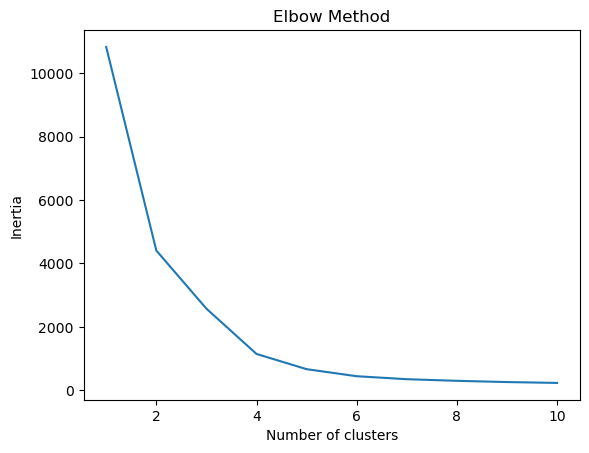

c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\oscar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
c:\Users\oscar\OneDrive - UOW Malaysia KDU\Intro to AI\A2\jackson chatbot\HatchRate.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean()
[2023-04-16 17:41:15] [INFO    ] discord.client: logging in using static token
[2023-04-16 17:41:17] [INFO    ] disc

Jackson bot#9823 is now running!
Kyron#1484 said: "Give me the good advice for hatching duck eggs" (jackson-bot)
꧁𓊈 Hazakura 𓊉꧂#4052 said: "hello" (jackson-bot)


In [1]:
import discord
import responses
import nest_asyncio
import asyncio

nest_asyncio.apply()

async def send_message(message, user_message, is_private):
    try:
        response = responses.get_response(user_message)

        async with message.channel.typing(): # Use "async with" to create a context where the bot is typing
            await asyncio.sleep(1.5) # Add a small delay to simulate typing
            await message.author.send(response) if is_private else await message.channel.send(response)

    except Exception as e:
        print(e)

def run_discord_bot():
    TOKEN = 'MTA5MjMxNjUxOTg3NjI3NjI5NA.GebDwb.SUPNov917dpN2V9s-iFyDYk757qNo3SnuSe_8A'
    intents = discord.Intents.default()
    intents.message_content = True
    client = discord.Client(intents=intents)

    @client.event
    async def on_ready():
        print(f'{client.user} is now running!')

    @client.event
    async def on_message(message):
        if message.author == client.user:
            return

        username = str(message.author)
        user_message = str(message.content)
        channel = str(message.channel)

        print(f'{username} said: "{user_message}" ({channel})')

        if user_message[0] == '?':
            user_message = user_message[0:]
            await send_message(message, user_message, is_private=True)
        else:
            await send_message(message, user_message, is_private=False)

    client.run(TOKEN)

run_discord_bot()
